In [166]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [167]:
import numpy as np
import pandas as pd

In [168]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [169]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [170]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [171]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [172]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [173]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [174]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [227]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date = pd.to_datetime(latest_date)

start_date = (latest_date - dt.timedelta(days=365)).to_pydatetime()[0]

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(session.query(measurement.date, measurement.prcp).filter(measurement.date > start_date).all())
#df.dropna(inplace=True)
# Sort the dataframe by date
df = df.sort_values('date')
df.set_index('date',inplace=True)


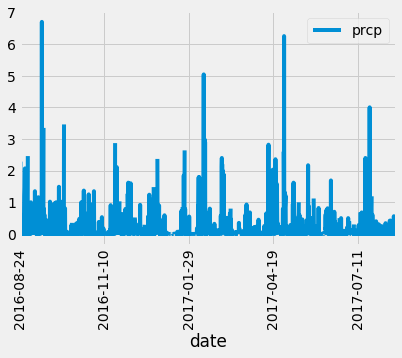

In [228]:

fig = df.plot(rot=90).get_figure()
fig.savefig('precipitation.png')


In [177]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [181]:
# Design a query to show how many stations are available in this dataset?
session.query(measurement.station).distinct().all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [226]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [196]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).first()[0]

highest = session.query(func.max(measurement.tobs)).filter(measurement.station == station_id).scalar()
lowest = session.query(func.min(measurement.tobs)).filter(measurement.station == station_id).scalar()

print(f"The most active station in the dataset is: {station_id}.")
print(f"Highest recorded temperature for {station_id} is {highest}.")
print(f"Lowest recorded temperature for {station_id} is {lowest}.")   

The most active station in the dataset is: USC00519281.
Highest recorded temperature for USC00519281 is 85.0.
Lowest recorded temperature for USC00519281 is 54.0.


The station with the highest number of temparature observations is: USC00519397.


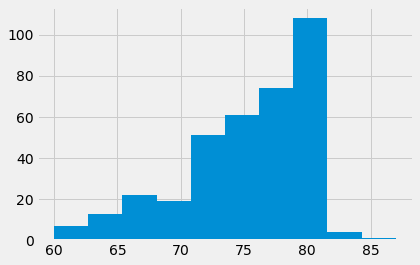

In [210]:
# Choose the station with the highest number of temperature observations in the last 12 months

station_id = session.query(measurement.station, func.count(measurement.station)).\
filter(measurement.date > start_date).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).first()[0]

print(f"The station with the highest number of temparature observations in the last year is: {station_id}.")

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.DataFrame(session.query(measurement.date, measurement.tobs).filter(measurement.station == station_id).filter(measurement.date > start_date).all())
df = df.sort_values('date')
df.set_index('date',inplace=True)

counts, bins = np.histogram(df)
plt.hist(bins[:-1], bins, weights=counts)

plt.savefig("Temperature.png")
                       

## Bonus Challenge Assignment

In [223]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [224]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
# filter(measurement.date >= '2015-02-28' ).all()



In [225]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


    

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
